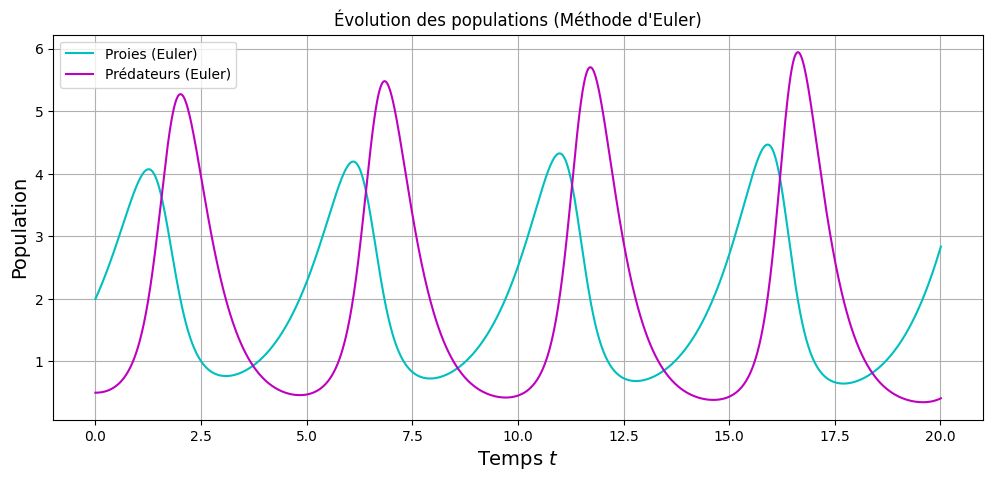

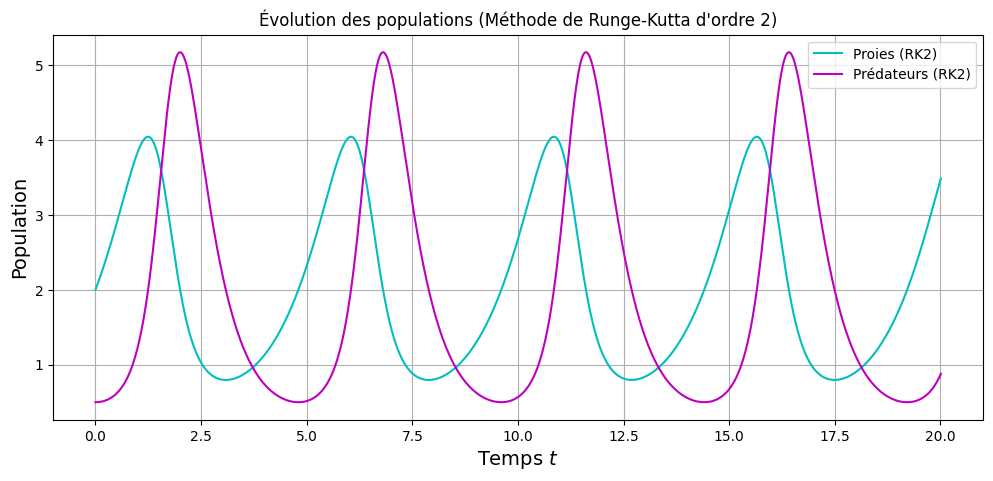

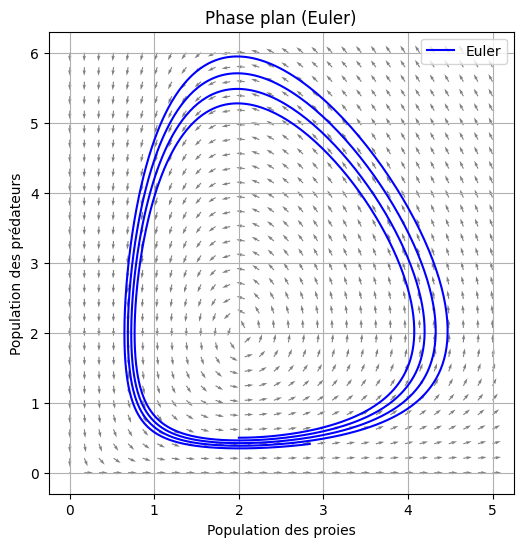

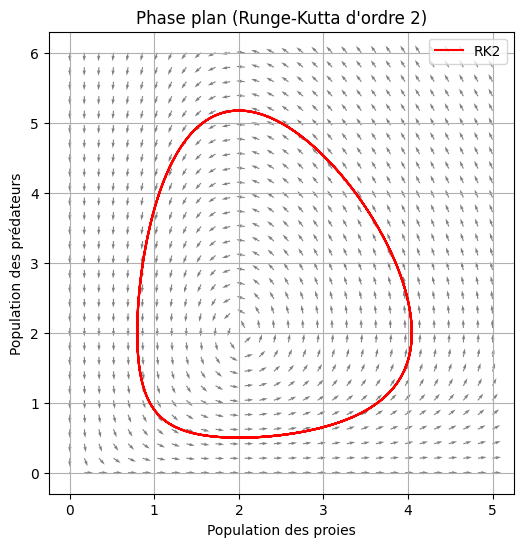

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Définition des fonctions f et g 
def f(t, x, y):
    alpha = 1.0  # Taux de reproduction des proies
    beta = 0.5   # Taux de mortalité des proies due aux prédateurs
    return x * (alpha - beta * y)

def g(t, x, y):
    gamma = 2.0  # Taux de reproduction des prédateurs dépendant des proies
    delta = 1.0  # Taux de mortalité des prédateurs
    return -y * (gamma - delta * x)

# Méthode d'Euler
def fct_Euler_2D(x0, y0, tmin, tmax, pas, F, G):
    t = np.arange(tmin, tmax + pas, pas)
    x = np.zeros(len(t))
    y = np.zeros(len(t))

    x[0] = x0
    y[0] = y0

    for k in range(len(t)-1):
        x[k+1] = x[k] + pas * F(t[k], x[k], y[k])
        y[k+1] = y[k] + pas * G(t[k], x[k], y[k])

    return x, y, t

# Méthode de Runge-Kutta d'ordre 2 (RK2)
def fct_RK2_2D(x0, y0, tmin, tmax, pas, F, G):
    t = np.arange(tmin, tmax + pas, pas)
    x = np.zeros(len(t))
    y = np.zeros(len(t))

    x[0] = x0
    y[0] = y0

    for k in range(len(t)-1):
        # Étape 1
        k1x = F(t[k], x[k], y[k])
        k1y = G(t[k], x[k], y[k])

        # Étape 2 (calcul des valeurs intermédiaires)
        k2x = F(t[k] + pas/2, x[k] + pas * k1x / 2, y[k] + pas * k1y / 2)
        k2y = G(t[k] + pas/2, x[k] + pas * k1x / 2, y[k] + pas * k1y / 2)

        # Mise à jour des valeurs
        x[k+1] = x[k] + pas * k2x
        y[k+1] = y[k] + pas * k2y

    return x, y, t

# Paramètres et conditions initiales
t_min = 0.0
t_max = 20.0  # Augmenté pour voir mieux l'évolution
h = 0.01
x0 = 2.0  # Population initiale des proies
y0 = 0.5  # Population initiale des prédateurs

# Calcul des solutions avec Euler et RK2
xEuler, yEuler, t = fct_Euler_2D(x0, y0, t_min, t_max, h, f, g)
xRK2, yRK2, t = fct_RK2_2D(x0, y0, t_min, t_max, h, f, g)

# Affichage des populations en fonction du temps (Méthode d'Euler)
plt.figure(figsize=(12, 5))
plt.plot(t, xEuler, 'c', label='Proies (Euler)')
plt.plot(t, yEuler, 'm', label='Prédateurs (Euler)')
plt.legend()
plt.xlabel('Temps $t$', fontsize=14)
plt.ylabel('Population', fontsize=14)
plt.title("Évolution des populations (Méthode d'Euler)")
plt.grid()

# Affichage des populations en fonction du temps (Méthode de Runge-Kutta d'ordre 2)
plt.figure(figsize=(12, 5))
plt.plot(t, xRK2, 'c', label='Proies (RK2)')
plt.plot(t, yRK2, 'm', label='Prédateurs (RK2)')
plt.legend()
plt.xlabel('Temps $t$', fontsize=14)
plt.ylabel('Population', fontsize=14)
plt.title("Évolution des populations (Méthode de Runge-Kutta d'ordre 2)")
plt.grid()

# Affichage des trajectoires et du champ de vecteurs
N = 30  # Ajusté pour meilleure lisibilité
ux = np.linspace(0, 5, N)
uy = np.linspace(0, 6, N)
x, y = np.meshgrid(ux, uy)

fxy = f(0, x, y)
gxy = g(0, x, y)
norme = np.sqrt(fxy**2 + gxy**2)
norme = np.where(norme == 0, 1, norme)  # Éviter la division par zéro
fxy = fxy / norme
gxy = gxy / norme

# Méthode d'Euler (champ de vecteurs + trajectoire)
plt.figure(figsize=(6, 6))
plt.quiver(x, y, fxy, gxy, color='gray')
plt.plot(xEuler, yEuler, 'b', label="Euler")
plt.xlabel("Population des proies")
plt.ylabel("Population des prédateurs")
plt.title("Phase plan (Euler)")
plt.legend()
plt.grid()

# Méthode de Runge-Kutta (champ de vecteurs + trajectoire)
plt.figure(figsize=(6, 6))
plt.quiver(x, y, fxy, gxy, color='gray')
plt.plot(xRK2, yRK2, 'r', label="RK2")
plt.xlabel("Population des proies")
plt.ylabel("Population des prédateurs")
plt.title("Phase plan (Runge-Kutta d'ordre 2)")
plt.legend()
plt.grid()

plt.show()
